# Data Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfLoan = pd.read_csv('loan_data.csv')
dfLoan.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [3]:
dfLoan.tail(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9568,0,all_other,0.1979,37.06,10.645425,22.17,667,5916.000000,28854,59.8,6,0,1,0
9569,0,home_improvement,0.1426,823.34,12.429216,3.62,722,3239.958333,33575,83.9,5,0,0,1
9570,0,all_other,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,1
9571,0,all_other,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1
9572,0,debt_consolidation,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [4]:
dfLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# EDA

In [5]:
dfLoan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
dfLoan[dfLoan['int.rate'] == dfLoan['int.rate'].max()]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9549,0,home_improvement,0.2164,729.70,11.877569,8.63,667,8280.041667,55442,66.9,9,0,1,1
9566,0,all_other,0.2164,551.08,11.002100,24.06,662,1800.000000,16441,49.8,9,0,0,1


In [7]:
sum(dfLoan[dfLoan['revol.util'] > 100]['not.fully.paid'])

10

In [8]:
dfLoan[dfLoan['fico'] == 827]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1613,1,home_improvement,0.1051,390.09,11.918391,2.92,827,8763.0,84236,4.6,0,0,0,0


In [9]:
dfLoan[dfLoan['inq.last.6mths'] == 33]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.0,26531,52.6,33,0,0,1


In [10]:
listItem = []
for col in dfLoan.columns :
    listItem.append([col, dfLoan[col].dtype, dfLoan[col].isna().sum(), round((dfLoan[col].isna().sum()/len(dfLoan[col])) * 100,2),
                    dfLoan[col].nunique(), list(dfLoan[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,credit.policy,int64,0,0.0,2,"[1, 0]"
1,purpose,object,0,0.0,7,"[educational, credit_card]"
2,int.rate,float64,0,0.0,249,"[0.1635, 0.2017]"
3,installment,float64,0,0.0,4788,"[315.3, 373.13]"
4,log.annual.inc,float64,0,0.0,1987,"[11.01006801, 10.77895629]"
5,dti,float64,0,0.0,2529,"[6.73, 14.32]"
6,fico,int64,0,0.0,44,"[612, 642]"
7,days.with.cr.line,float64,0,0.0,2687,"[13410.04167, 4933.958333]"
8,revol.bal,int64,0,0.0,7869,"[8710, 27293]"
9,revol.util,float64,0,0.0,1035,"[29.6, 104.2]"


In [11]:
dfLoan['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

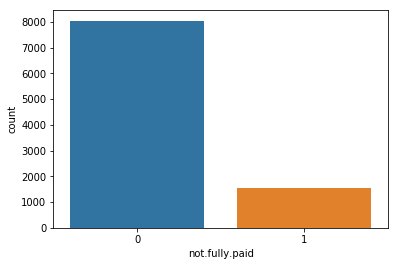

In [12]:
sns.countplot('not.fully.paid', data=dfLoan)

In [13]:
(dfLoan['not.fully.paid'].value_counts()/len(dfLoan)) * 100

0    83.994571
1    16.005429
Name: not.fully.paid, dtype: float64

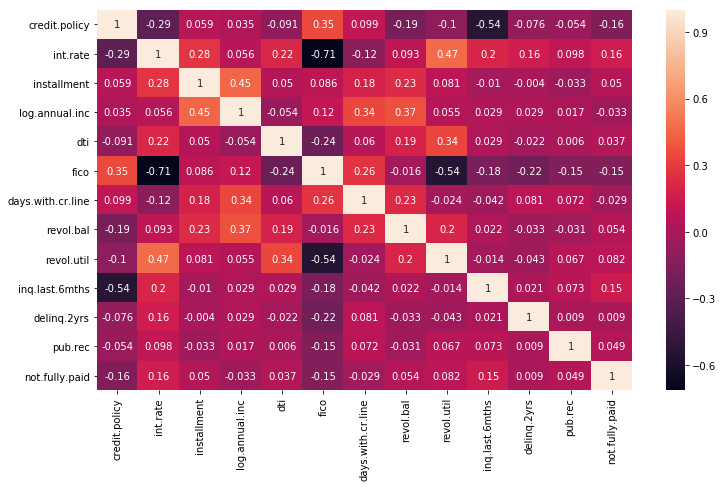

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(round(dfLoan.corr(), 3), annot=True)

Text(0.5,0,'FICO')

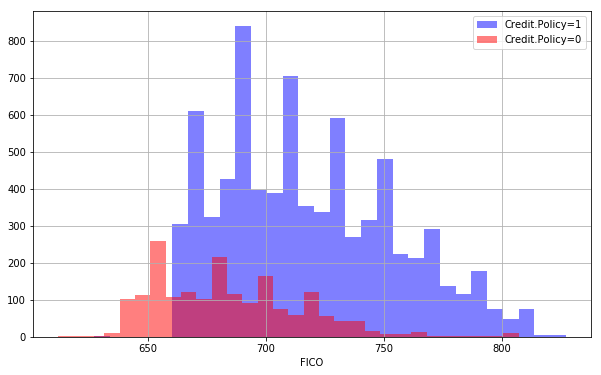

In [15]:
plt.figure(figsize=(10,6))
dfLoan[dfLoan['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
dfLoan[dfLoan['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5,0,'FICO')

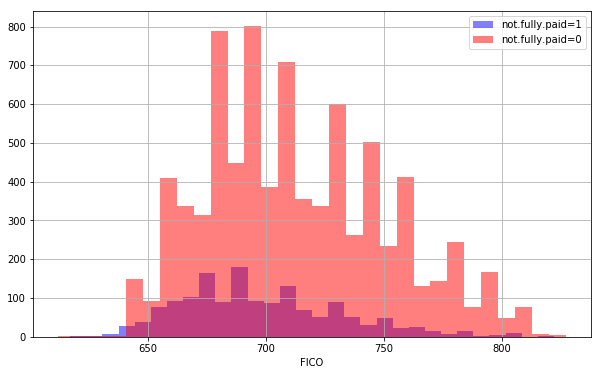

In [16]:
plt.figure(figsize=(10,6))
dfLoan[dfLoan['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
dfLoan[dfLoan['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5,0,'days.with.cr.line')

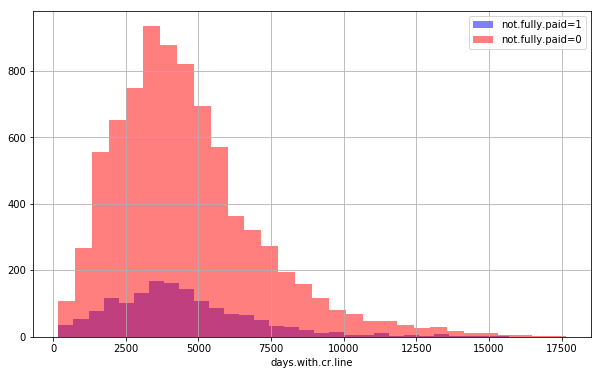

In [17]:
plt.figure(figsize=(10,6))
dfLoan[dfLoan['not.fully.paid']==1]['days.with.cr.line'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
dfLoan[dfLoan['not.fully.paid']==0]['days.with.cr.line'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('days.with.cr.line')

Text(0.5,0,'revol.bal')

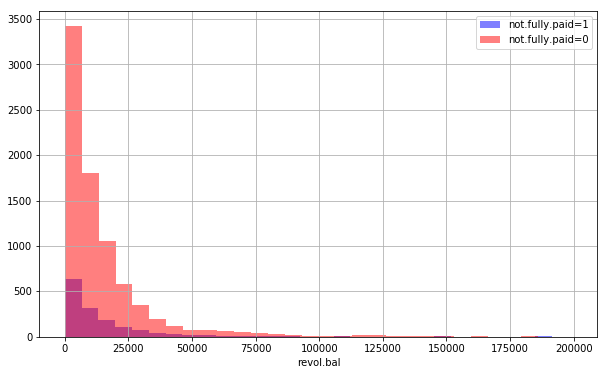

In [18]:
plt.figure(figsize=(10,6))
dfLoan[(dfLoan['not.fully.paid']==1) & (dfLoan['revol.bal'] < 200000)]['revol.bal'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
dfLoan[(dfLoan['not.fully.paid']==0) & (dfLoan['revol.bal'] < 200000)]['revol.bal'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.bal')

In [19]:
dfLoan[dfLoan['revol.bal'] > 1000000]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9535,0,small_business,0.1496,831.52,12.765688,11.38,717,8520.041667,1207359,56.0,7,0,0,1


Text(0.5,0,'revol.bal')

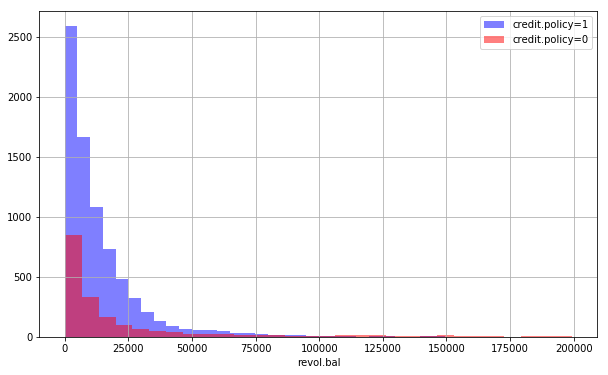

In [20]:
plt.figure(figsize=(10,6))
dfLoan[(dfLoan['credit.policy']==1) & (dfLoan['revol.bal'] < 200000)]['revol.bal'].hist(alpha=0.5,color='blue',
                                              bins=30,label='credit.policy=1')
dfLoan[(dfLoan['credit.policy']==0) & (dfLoan['revol.bal'] < 200000)]['revol.bal'].hist(alpha=0.5,color='red',
                                              bins=30,label='credit.policy=0')
plt.legend()
plt.xlabel('revol.bal')

Text(0.5,0,'revol.bal')

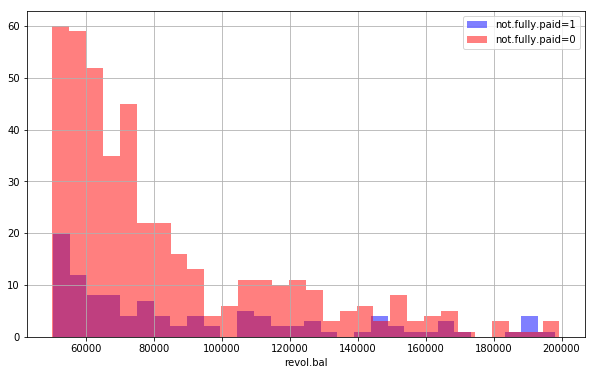

In [21]:
plt.figure(figsize=(10,6))
dfLoan[(dfLoan['not.fully.paid']==1) & (dfLoan['revol.bal'] < 200000) & (dfLoan['revol.bal'] > 50000)]['revol.bal'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
dfLoan[(dfLoan['not.fully.paid']==0) & (dfLoan['revol.bal'] < 200000) & (dfLoan['revol.bal'] > 50000)]['revol.bal'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.bal')

Text(0.5,0,'revol.util')

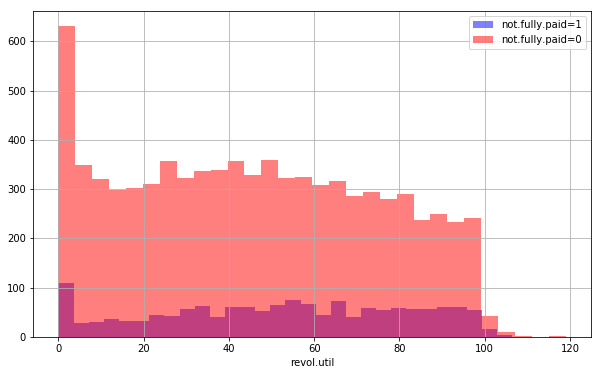

In [22]:
plt.figure(figsize=(10,6))
dfLoan[dfLoan['not.fully.paid']==1]['revol.util'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
dfLoan[dfLoan['not.fully.paid']==0]['revol.util'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.util')

Text(0.5,0,'revol.util')

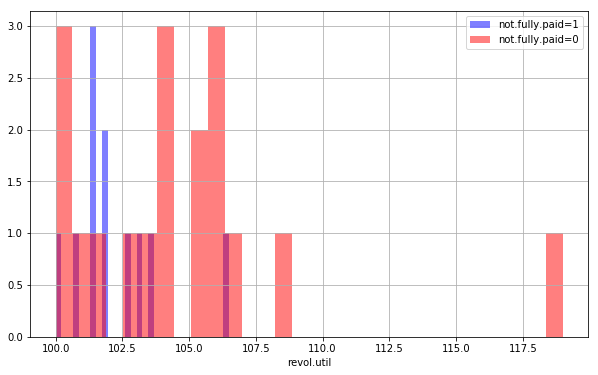

In [23]:
plt.figure(figsize=(10,6))
dfLoan[(dfLoan['not.fully.paid']==1) & (dfLoan['revol.util'] >= 100)]['revol.util'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
dfLoan[(dfLoan['not.fully.paid']==0) & (dfLoan['revol.util'] >= 100)]['revol.util'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.util')

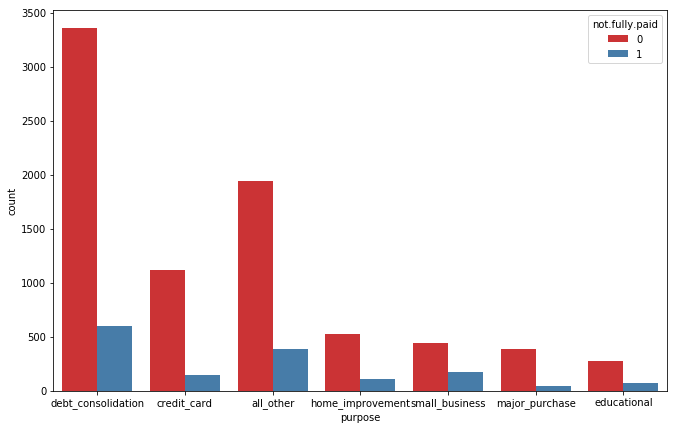

In [24]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=dfLoan,palette='Set1')

In [25]:
listItem = []
for purpose in dfLoan['purpose'].unique() :
    listItem.append([
        purpose,
        (len(
            dfLoan[(dfLoan['purpose'] == purpose) 
               & (dfLoan['not.fully.paid'] == 0)]
        )/len(dfLoan[dfLoan['purpose'] == purpose])) * 100,
        (len(
            dfLoan[(dfLoan['purpose'] == purpose) 
               & (dfLoan['not.fully.paid'] == 1)]
        )/len(dfLoan[dfLoan['purpose'] == purpose])) * 100
    ])
dfPurposePaid = pd.DataFrame(listItem, columns=['Purpose','Full %','Not Full %'])
dfPurposePaid.sort_values(by=['Not Full %'], ascending=False)

,Purpose,Full %,Not Full %
4,small_business,72.213247,27.786753
6,educational,79.883382,20.116618
3,home_improvement,82.988871,17.011129
2,all_other,83.397683,16.602317
0,debt_consolidation,84.761183,15.238817
1,credit_card,88.431062,11.568938
5,major_purchase,88.787185,11.212815


In [26]:
dfLoan['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

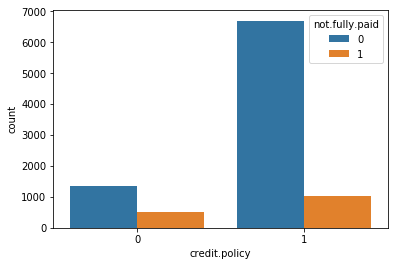

In [27]:
sns.countplot(x='credit.policy', hue='not.fully.paid', data=dfLoan)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


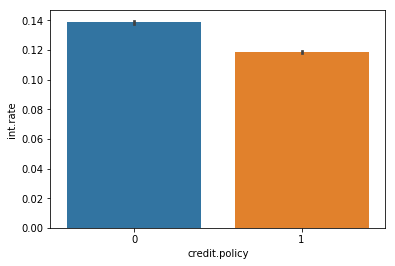

In [28]:
sns.barplot(x='credit.policy', y='int.rate', data=dfLoan, estimator=np.mean)

In [29]:
dfLoan[(dfLoan['int.rate'] == dfLoan[dfLoan['credit.policy'] == 1]['int.rate'].max()) & (dfLoan['credit.policy'] == 1)]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
5679,1,debt_consolidation,0.2121,746.24,11.736069,19.87,662,7920.000000,90063,79.6,1,0,0,1
5868,1,small_business,0.2121,491.20,11.957611,10.45,667,3538.000000,14718,40.4,1,0,0,0
6202,1,small_business,0.2121,755.69,11.248960,5.72,672,1440.000000,500,83.3,1,0,0,0
6517,1,debt_consolidation,0.2121,816.14,11.034890,15.45,667,3120.041667,10190,98.9,1,0,0,0


C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


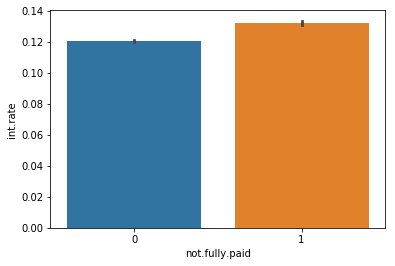

In [30]:
sns.barplot(x='not.fully.paid', y='int.rate', data=dfLoan, estimator=np.mean)

C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 792x504 with 0 Axes>

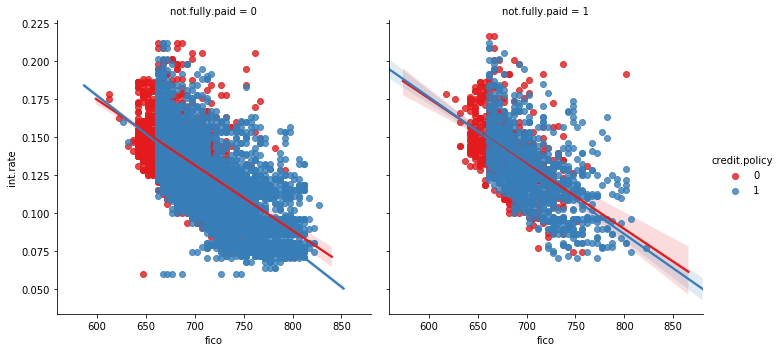

In [31]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=dfLoan,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# One Hot Encoding

In [32]:
final_data = pd.get_dummies(dfLoan,columns=['purpose'],drop_first=True)

In [33]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [34]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Train Test Split

In [35]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('not.fully.paid',axis=1), 
                                                    final_data['not.fully.paid'], test_size=0.30, 
                                                    random_state=101)

# Train The Model

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(n_estimators=100, random_state=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

# Feature Importances

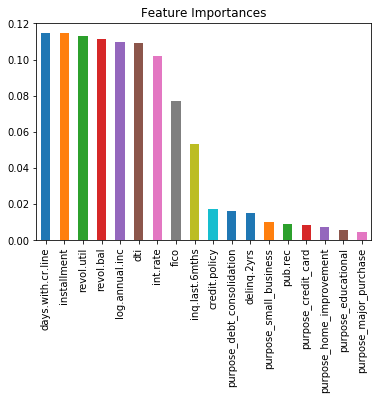

In [40]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False)
coef1.plot(kind='bar', title='Feature Importances')

# Evaluate Model

### Training Error

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, log_loss, roc_auc_score, f1_score

In [42]:
predictTrain = rfc.predict(X_train)

In [43]:
con = pd.DataFrame(data=confusion_matrix(y_train,predictTrain), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No   5614      0
A Yes     0   1090


In [44]:
print(classification_report(y_train,predictTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5614
           1       1.00      1.00      1.00      1090

   micro avg       1.00      1.00      1.00      6704
   macro avg       1.00      1.00      1.00      6704
weighted avg       1.00      1.00      1.00      6704



In [45]:
predictProbTrain = rfc.predict_proba(X_train)
predictProbTrain

array([[0.28, 0.72],
       [1.  , 0.  ],
       [0.22, 0.78],
       ...,
       [0.84, 0.16],
       [1.  , 0.  ],
       [0.97, 0.03]])

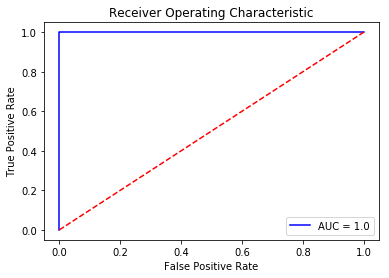

In [46]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Testing Error

In [47]:
predictTest = rfc.predict(X_test)

In [48]:
con = pd.DataFrame(data=confusion_matrix(y_test,predictTest), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No   2418     13
A Yes   430     13


In [49]:
print(classification_report(y_test,predictTest))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.50      0.03      0.06       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.67      0.51      0.49      2874
weighted avg       0.80      0.85      0.78      2874



In [50]:
predictProbTest = rfc.predict_proba(X_test)

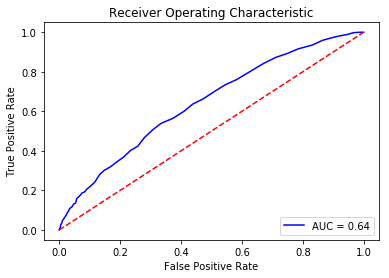

In [51]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Solving Imbalance Classification (EX 1)

In [89]:
from sklearn.model_selection import GridSearchCV

parameters = {'class_weight':({0:1, 1:15},{0:1, 1:2},{0:1, 1:10}),
             'min_samples_leaf': (35,5,25)}
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
dt = GridSearchCV(rfc, parameters, 
                  scoring = ['recall','roc_auc'],
                  refit='roc_auc',cv=5)
dt.fit(X_train, y_train)
dt.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 2},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=35,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=101, verbose=0, warm_start=False)

In [90]:
rfc = dt.best_estimator_

### Training Error

In [91]:
predictTrain = rfc.predict(X_train)

In [92]:
con = pd.DataFrame(data=confusion_matrix(y_train,predictTrain), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No   5561     53
A Yes   968    122


In [93]:
print(classification_report(y_train,predictTrain))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      5614
           1       0.70      0.11      0.19      1090

   micro avg       0.85      0.85      0.85      6704
   macro avg       0.77      0.55      0.55      6704
weighted avg       0.83      0.85      0.80      6704



In [94]:
predictProbTrain = rfc.predict_proba(X_train)

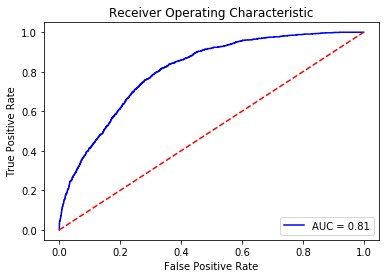

In [95]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Testing Error

In [96]:
predictTest = rfc.predict(X_test)

In [97]:
con = pd.DataFrame(data=confusion_matrix(y_test,predictTest), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No   2395     36
A Yes   423     20


In [98]:
print(classification_report(y_test,predictTest))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.36      0.05      0.08       443

   micro avg       0.84      0.84      0.84      2874
   macro avg       0.60      0.52      0.50      2874
weighted avg       0.77      0.84      0.78      2874



In [99]:
predictProbTest = rfc.predict_proba(X_test)

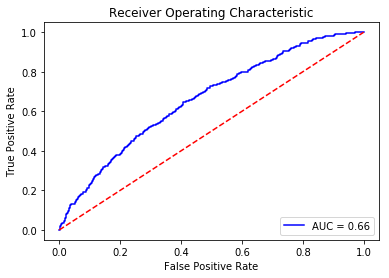

In [100]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Solving Imbalance Classification (EX 2)

In [101]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [102]:
sum(y_train)

1090

In [103]:
len(y_train)

6704

In [104]:
len(y_train) - sum(y_train)

5614

In [105]:
ros = RandomOverSampler(random_state=101)
# ros = SMOTE(random_state=101)

X_ros, y_ros = ros.fit_sample(X_train, y_train)
X_ros = pd.DataFrame(X_ros, columns=X_train.columns)

In [107]:
sum(y_ros)

5614

In [108]:
len(y_ros)

11228

In [109]:
len(y_ros) - sum(y_ros)

5614

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=50, min_samples_leaf=25)
rfc.fit(X_ros,y_ros)

### Training Error

In [ ]:
predictTrain = rfc.predict(X_train)

In [ ]:
con = pd.DataFrame(data=confusion_matrix(y_train,predictTrain), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

In [ ]:
print(classification_report(y_train,predictTrain))

In [ ]:
predictProbTrain = rfc.predict_proba(X_train)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Testing Error

In [ ]:
predictTest = rfc.predict(X_test)

In [ ]:
con = pd.DataFrame(data=confusion_matrix(y_test,predictTest), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

In [ ]:
print(classification_report(y_test,predictTest))

In [ ]:
predictProbTest = rfc.predict_proba(X_test)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Testing Other Models

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [ ]:
ros = RandomOverSampler(random_state=101)
# ros = SMOTE(random_state=101)

X_ros, y_ros = ros.fit_sample(X_train, y_train)
X_ros = pd.DataFrame(X_ros, columns=X_train.columns)
gbc.fit(X_ros, y_ros)

### Training Error

In [ ]:
predictTrain = gbc.predict(X_train)

In [ ]:
con = pd.DataFrame(data=confusion_matrix(y_train,predictTrain), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

In [ ]:
print(classification_report(y_train,predictTrain))

In [ ]:
predictProbTrain = gbc.predict_proba(X_train)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Testing Error

In [ ]:
predictTest = gbc.predict(X_test)

In [ ]:
con = pd.DataFrame(data=confusion_matrix(y_test,predictTest), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

In [ ]:
print(classification_report(y_test,predictTest))

In [ ]:
predictProbTest = gbc.predict_proba(X_test)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1)

In [ ]:
ros = RandomOverSampler(random_state=101)
# ros = SMOTE(random_state=101)

X_ros, y_ros = ros.fit_sample(X_train, y_train)
X_ros = pd.DataFrame(X_ros, columns=X_train.columns)
xgb.fit(X_ros, y_ros)

### Training Error

In [ ]:
predictTrain = xgb.predict(X_train)

In [ ]:
con = pd.DataFrame(data=confusion_matrix(y_train,predictTrain), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

In [ ]:
print(classification_report(y_train,predictTrain))

In [ ]:
predictProbTrain = xgb.predict_proba(X_train)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Testing Error

In [ ]:
predictTest = xgb.predict(X_test)

In [ ]:
con = pd.DataFrame(data=confusion_matrix(y_test,predictTest), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

In [ ]:
print(classification_report(y_test,predictTest))

In [ ]:
predictProbTest = xgb.predict_proba(X_test)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()